In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
%pip install git+https://github.com/Schwarzam/lsdb@server-test

  Cloning https://github.com/Schwarzam/lsdb (to revision server-test) to /private/var/folders/rd/8h7ybv_n2d18q3t1xryryq6r0000gp/T/pip-req-build-d2ee_1n6
  Running command git clone --filter=blob:none --quiet https://github.com/Schwarzam/lsdb /private/var/folders/rd/8h7ybv_n2d18q3t1xryryq6r0000gp/T/pip-req-build-d2ee_1n6
  Running command git checkout -b server-test --track origin/server-test
  Switched to a new branch 'server-test'
  branch 'server-test' set up to track 'origin/server-test'.
  Resolved https://github.com/Schwarzam/lsdb to commit 52aebf033c38958d20b620517335da29878ccd76
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


In [46]:
import splusdata
import lsdb

# Explore the HiPSCat catalogs and plot sky maps
from hipscat.catalog import Catalog
from hipscat.inspection import plot_pixels

## Exploring splus dual's hipscat

In [47]:
cat_link = "https://splus.cloud/HIPS/catalogs/dr4/dual/"
margin_link = "https://splus.cloud/HIPS/catalogs/dr4/dual_2arcsec"

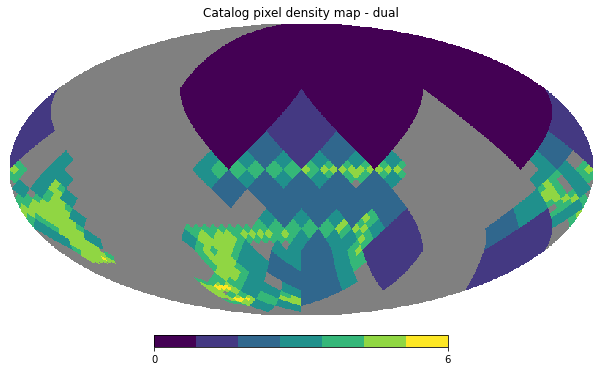

In [67]:
# Read the HiPSCat catalog metadata, it does not load any data, just healpix pixels and other metadata
splus_hipscat_catalog = Catalog.read_from_hipscat(cat_link)
plot_pixels(splus_hipscat_catalog)

### Creating cluster client (optional)

This dask client is optional, but it can be useful to monitor the progress of the computation.

In [49]:
from dask.distributed import Client

client = Client(n_workers=4, memory_limit="auto")
client

/Users/gustavo/miniconda3/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 55457 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:55457/status,
Dashboard: http://127.0.0.1:55457/status,Workers: 4
Total threads: 8,Total memory: 16.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:55458,Workers: 4
Dashboard: http://127.0.0.1:55457/status,Total threads: 8
Started: Just now,Total memory: 16.00 GiB
Comm: tcp://127.0.0.1:55469,Total threads: 2
Dashboard: http://127.0.0.1:55474/status,Memory: 4.00 GiB
Nanny: tcp://127.0.0.1:55461,


### Exploring the data 

Lets print the columns of the data and the first few rows.

In [68]:
splus_hips = lsdb.read_hipscat(cat_link)
list(splus_hips.columns)

['ID',
 'RA',
 'DEC',
 'A',
 'B',
 'BACKGROUND',
 'BACKGROUND_J0378',
 'BACKGROUND_J0395',
 'BACKGROUND_J0410',
 'BACKGROUND_J0430',
 'BACKGROUND_J0515',
 'BACKGROUND_J0660',
 'BACKGROUND_J0861',
 'BACKGROUND_g',
 'BACKGROUND_i',
 'BACKGROUND_r',
 'BACKGROUND_u',
 'BACKGROUND_z',
 'CLASS_STAR',
 'DET_ID_dual',
 'EBV_SCH',
 'ELLIPTICITY',
 'ELONGATION',
 'FLUX_RADIUS_20',
 'FLUX_RADIUS_50',
 'FLUX_RADIUS_70',
 'FLUX_RADIUS_90',
 'FWHM',
 'FWHM_J0378',
 'FWHM_J0395',
 'FWHM_J0410',
 'FWHM_J0430',
 'FWHM_J0515',
 'FWHM_J0660',
 'FWHM_J0861',
 'FWHM_g',
 'FWHM_i',
 'FWHM_n',
 'FWHM_n_J0378',
 'FWHM_n_J0395',
 'FWHM_n_J0410',
 'FWHM_n_J0430',
 'FWHM_n_J0515',
 'FWHM_n_J0660',
 'FWHM_n_J0861',
 'FWHM_n_g',
 'FWHM_n_i',
 'FWHM_n_r',
 'FWHM_n_u',
 'FWHM_n_z',
 'FWHM_r',
 'FWHM_u',
 'FWHM_z',
 'Field',
 'ID_DEC',
 'ID_RA',
 'ISOarea',
 'J0378_ID_dual',
 'J0378_PStotal',
 'J0378_aper_3',
 'J0378_aper_6',
 'J0378_auto',
 'J0378_iso',
 'J0378_petro',
 'J0395_ID_dual',
 'J0395_PStotal',
 'J0395_ape

In [51]:
## Note that this can take a while to run because 
# lsdb is downloading a full catalog from the 
# HiPSCat server and then printing the first 20 rows
splus_hips.head(20)

,ID,RA,DEC,A,B,BACKGROUND,BACKGROUND_J0378,BACKGROUND_J0395,BACKGROUND_J0410,BACKGROUND_J0430,...,z_ID_dual,z_PStotal,z_aper_3,z_aper_6,z_auto,z_iso,z_petro,Norder,Dir,Npix
_hipscat_index,,,,,,,,,,,,,,,,,,,,,
17960009728,DR4_3_STRIPE82-0065_0022486,45.004593,0.006121,0.000735,0.000691,0.006137,-0.000024,-0.001126,0.000159,-0.001306,...,iDR4_3_STRIPE82-0065_dual_0022486,24.353069,24.669477,24.112814,99.000000,21.773548,99.000000,0,0,0
34741420032,DR4_3_STRIPE82-0065_0030834,44.995360,0.005961,0.000696,0.000637,-0.010784,-0.000893,-0.002218,-0.002334,-0.003556,...,iDR4_3_STRIPE82-0065_dual_0030834,99.000000,99.000000,99.000000,99.000000,23.923128,99.000000,0,0,0
116719091712,DR4_3_STRIPE82-0066_0000044,45.004959,0.020076,0.000381,0.000193,-0.000907,0.001401,0.002104,0.003611,0.003085,...,iDR4_3_STRIPE82-0066_dual_0000044,13.644547,13.942856,13.673130,13.684365,14.166495,13.730668,0,0,0
118560391168,DR4_3_STRIPE82-0066_0000065,45.004305,0.021058,0.000467,0.000328,-0.001400,0.001511,0.002080,0.003610,0.003364,...,iDR4_3_STRIPE82-0066_dual_0000065,16.171890,16.470200,16.172211,14.320644,16.067835,14.785735,0,0,0
226395947008,DR4_3_STRIPE82-0066_0000066,45.004323,0.026251,0.000134,0.000078,-0.004885,-0.000505,-0.001117,-0.001540,0.000583,...,iDR4_3_STRIPE82-0066_dual_0000066,21.340076,21.638386,22.200613,23.086054,22.602152,21.080063,0,0,0
265293922304,DR4_3_STRIPE82-0066_0000191,45.003119,0.033159,0.000078,0.000075,-0.001825,-0.000169,0.000293,0.000398,0.000090,...,iDR4_3_STRIPE82-0066_dual_0000191,21.302738,21.601048,21.142643,21.410231,22.873741,21.151049,0,0,0
272013197312,DR4_3_STRIPE82-0066_0000256,45.002669,0.035006,0.000246,0.000194,-0.001088,0.000202,0.000673,0.001915,0.000283,...,iDR4_3_STRIPE82-0066_dual_0000256,20.054935,20.353245,20.230881,19.812674,20.137627,19.916756,0,0,0
317743693824,DR4_3_STRIPE82-0066_0000116,45.018902,0.029832,0.000255,0.000144,-0.003727,-0.000867,-0.001326,-0.001959,-0.001836,...,iDR4_3_STRIPE82-0066_dual_0000116,20.920692,21.219002,20.708523,21.011312,21.081661,21.724323,0,0,0
339080118272,DR4_3_STRIPE82-0066_0000217,45.018978,0.034176,0.000170,0.000103,-0.000794,0.000226,0.000020,-0.000077,0.002091,...,iDR4_3_STRIPE82-0066_dual_0000217,20.883371,21.181681,20.281492,20.254286,21.601944,20.227455,0,0,0


## Now here is where lsdb shines

Lets do a cone search around the coordinates of the galaxy and plot the results.

In [75]:
splus_margin = lsdb.read_hipscat(margin_link)
splus_hips = lsdb.read_hipscat(
    cat_link,
    margin_cache=splus_margin,
    cols = ["ID", "RA", "DEC", # Try messing with the columns
            "r_auto", "e_r_auto",
            "g_auto", "e_g_auto",
            "i_auto", "e_i_auto",
            "z_auto", "e_z_auto",
            "u_auto", "e_u_auto",
            "J0378_auto", "e_J0378_auto",
            "J0395_auto", "e_J0395_auto",
            "J0410_auto", "e_J0410_auto",
            "J0430_auto", "e_J0430_auto",
            "J0515_auto", "e_J0515_auto",
            "J0660_auto", "e_J0660_auto",
            "J0861_auto", "e_J0861_auto",
            ],
    query=["r_auto < 20"] # Try messing with this query
)

res = splus_hips.cone_search(
    0.1,
    0.1,
    100 * 3600
)

table = res.compute()

2024-05-15 22:33:38,662 - distributed.worker.memory - WARNING - Worker is at 86% memory usage. Pausing worker.  Process memory: 3.44 GiB -- Worker memory limit: 4.00 GiB
2024-05-15 22:33:38,889 - distributed.client - WARNING - Couldn't gather 1 keys, rescheduling (('repartitiontofewer-5fc1f77d370674b2be0c3ff79cfff2c5', 0),)
2024-05-15 22:34:12,830 - distributed.client - WARNING - Couldn't gather 1 keys, rescheduling (('repartitiontofewer-5fc1f77d370674b2be0c3ff79cfff2c5', 0),)
2024-05-15 22:34:48,880 - distributed.worker.memory - WARNING - Worker is at 89% memory usage. Pausing worker.  Process memory: 3.57 GiB -- Worker memory limit: 4.00 GiB
2024-05-15 22:34:48,881 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 3.57 GiB -- Worker memory limit: 4.00

2024-05-15 22:33:38,778 - distributed.nanny.memory - WARNING - Worker tcp://127.0.0.1:55472 (pid=9639) exceeded 95% memory budget. Restarting...
2024-05-15 22:33:38,868 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:55472' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('repartitiontofewer-5fc1f77d370674b2be0c3ff79cfff2c5', 0)} (stimulus_id='handle-worker-cleanup-1715823218.868317')
2024-05-15 22:33:38,885 - distributed.scheduler - ERROR - Couldn't gather keys: {('repartitiontofewer-5fc1f77d370674b2be0c3ff79cfff2c5', 0): 'waiting'}
2024-05-15 22:33:38,890 - distributed.nanny - WARNING - Restarting worker
2024-05-15 22:34:12,669 - distributed.nanny.memory - WARNING - Worker tcp://127.0.0.1:55471 (pid=9637) exceeded 95% memory budget. Restarting...
2024-05-15 22:34:12,812 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:55471' caused the cluster to lose already computed task(s), which will be recomputed 

In [76]:
table

,ID,RA,DEC,r_auto,e_r_auto,g_auto,e_g_auto,i_auto,e_i_auto,z_auto,...,J0410_auto,e_J0410_auto,J0430_auto,e_J0430_auto,J0515_auto,e_J0515_auto,J0660_auto,e_J0660_auto,J0861_auto,e_J0861_auto
0,DR4_3_STRIPE82-0066_0000044,45.004959,0.020076,14.159901,0.001395,15.068098,0.002202,13.846167,0.001331,13.684365,...,15.986431,0.387967,16.788044,5.885657,16.386433,3.079818,16.385424,0.906008,13.887040,0.729198
1,DR4_3_STRIPE82-0066_0000065,45.004305,0.021058,15.005594,0.629191,15.979292,0.840003,14.562429,0.552798,14.320644,...,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,17.297266,6.143391,15.225653,5.427844
2,DR4_3_STRIPE82-0066_0000562,44.963875,0.043623,18.180655,0.016284,19.054226,0.027664,17.868900,0.017620,17.746120,...,19.766886,0.179669,19.501818,0.136326,18.842274,0.067782,18.094883,0.020291,17.608850,0.041634
3,DR4_3_STRIPE82-0066_0001190,44.998293,0.066357,19.519581,0.046329,20.037363,0.058658,19.416941,0.062222,19.710333,...,20.331202,0.273176,20.187262,0.232385,19.763718,0.140990,19.634521,0.069793,19.214119,0.161537
4,DR4_3_STRIPE82-0066_0000951,45.048241,0.048270,15.040378,0.002169,15.857819,0.003321,14.713120,0.002048,14.542634,...,16.555588,0.013981,16.381737,0.011979,15.664183,0.006716,14.930761,0.002582,14.575599,0.004178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22550,DR4_3_STRIPE82-0107_0066498,314.983428,-0.020016,18.507229,0.027714,19.777407,0.061920,17.339193,0.014508,16.804287,...,20.270529,0.338993,21.630606,1.076579,19.862091,0.187894,18.072298,0.020673,16.945295,0.020787
22551,DR4_3_STRIPE82-0107_0059542,315.003648,-0.006771,19.181507,0.046634,20.650160,0.125375,17.824886,0.020551,17.253719,...,21.214445,0.742829,99.000000,99.000000,20.225777,0.242048,18.824913,0.036585,17.427006,0.029403
22552,DR4_3_STRIPE82-0107_0063040,315.005031,-0.005765,19.282608,0.057362,19.902647,0.072374,19.213865,0.079355,19.130104,...,19.877880,0.248656,19.669127,0.187864,19.541105,0.147447,19.307926,0.062438,18.938171,0.127325
22553,DR4_3_STRIPE82-0107_0057005,314.990403,-0.008371,17.753510,0.013264,19.085968,0.030270,17.070297,0.010376,16.785967,...,19.975368,0.225682,21.136112,0.593753,18.946650,0.072438,17.481199,0.011788,16.861507,0.017233


In [63]:
res = splus_hips.box(
    [-2, 2], ## RA range
    [-2, 2],  ## DEC range,
)

res.compute()

,ID,RA,DEC,r_auto,e_r_auto,g_auto,e_g_auto,i_auto,e_i_auto,z_auto,e_z_auto,u_auto,e_u_auto
0,DR4_3_STRIPE82-0003_0000085,1.554405,-1.371034,18.429626,13.664538,19.185162,11.473213,17.875586,4.679826,16.477358,3.996477,99.000000,99.000000
1,DR4_3_STRIPE82-0003_0000438,1.595159,-1.358430,18.000814,0.016028,18.526474,0.021786,17.803116,0.017963,17.741529,0.029500,19.895712,0.108585
2,DR4_3_STRIPE82-0003_0000134,1.256873,-1.370690,18.268562,0.019937,19.537285,0.051256,16.828947,0.008209,16.230253,0.008168,99.000000,99.000000
3,DR4_3_STRIPE82-0003_0000307,1.223286,-1.361223,19.966227,0.117745,21.589863,0.441504,19.471077,0.105823,19.039448,0.128715,21.828426,0.842669
4,DR4_3_STRIPE82-0003_0000246,1.380513,-1.365134,19.201525,0.039959,20.334110,0.093189,18.663759,0.034329,18.310804,0.044388,21.918550,0.600922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7669,DR4_3_STRIPE82-0170_0042098,358.475751,1.408126,19.684980,0.074767,20.738712,0.162151,19.995260,0.147121,19.733471,0.216091,21.030422,0.303724
7670,DR4_3_STRIPE82-0170_0043705,358.374794,1.393845,15.888436,0.003466,16.454149,0.004871,15.709853,0.003581,15.685949,0.005181,18.210665,0.021596
7671,DR4_3_STRIPE82-0170_0043676,358.385998,1.397918,14.869638,0.002011,15.390437,0.002771,14.713771,0.002011,14.689505,0.002663,17.087662,0.010229
7672,DR4_3_STRIPE82-0170_0043514,358.358927,1.401275,19.120354,0.028555,19.944632,0.049436,18.817022,0.031187,18.743505,0.052431,22.329544,0.584440
